In [2]:
import emnist
from emnist import list_datasets
list_datasets()


['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [3]:
from emnist import extract_training_samples
global images, labels
images, labels = extract_training_samples('byclass')


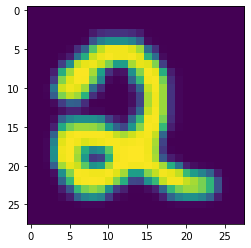

In [5]:
import matplotlib.pyplot as plt
plt.imshow(images[78])
plt.show()


(697932, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

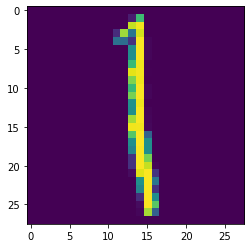

In [6]:
import tensorflow as tf
import keras
import numpy as np
#images = np.reshape()
print(images.shape)
plt.imshow(images[543])
plt.show

In [7]:
st = 0
en = 0
bs = 697932
global model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (1,28,28)))
model.add(tf.keras.layers.Dense(256 ,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(62, activation = tf.nn.softmax))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')#, matrics = ['accuracy'])

In [8]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 62)                15934     
Total params: 282,686
Trainable params: 282,686
Non-trainable params: 0
_________________________________________________________________


In [9]:
def batch(beg, end):
    loc_img = images[beg:end]
    loc_lab = labels[beg:end]
    #loc_img = loc_img.reshape(-1,784)
    loc_img = tf.keras.utils.normalize(loc_img, axis = 1)
    loc_lab = tf.keras.utils.to_categorical(loc_lab,62)
    #for i in 1000:
    model.fit(loc_img,loc_lab, epochs = 1)

    
    del loc_img, loc_lab
#loc = images[0]
#plt.imshow(loc)
#plt.show()

In [10]:
st = 0
en = 1000
while(en<=697000):
  
    batch(st,en)
    st = st + 1000
    en = en + 1000




    

32/32 [==============================] - 0s 12ms/step - loss: 0.6759


32/32 [==============================] - 0s 11ms/step - loss: 0.5400


32/32 [==============================] - 0s 11ms/step - loss: 0.5921


32/32 [==============================] - 0s 12ms/step - loss: 0.5327


32/32 [==============================] - 0s 11ms/step - loss: 0.5481


32/32 [==============================] - 0s 11ms/step - loss: 0.4875


In [17]:
acc = model.predict(tf.keras.utils.normalize(images[96], axis = 1))
print(acc)

ValueError: in user code:

    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /home/ishaan/miniconda3/envs/ocr/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [None, 28]


In [18]:
model.save()

TypeError: save() missing 1 required positional argument: 'filepath'

In [16]:
model.save('//home//ishaan//Desktop')

INFO:tensorflow:Assets written to: //home//ishaan//Desktop/assets
